# Teoria da Semana 6

### Professor: Kazuki Yokoyama | Tema: Redução de Dimensionalidade e Seleção de Variáveis

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

**Redução de Dimensionalidade:** Redução de dimensões por **transformação** das variáveis originais do *dataset*, trazendo os dados para um espaço de dimensões menores.

**Seleção de Variáveis:** Redução de dimensões **retirando** as variáveis que acrescentam pouco valor para a tarefa de predição, como uma espécie de filtro

### Redução de Dimensionalidade

Cada problema apresenta um número de dimensões, uns mais e outros menos. A questão é: será que existe redundância? Ou seja, um problema com 50 dimensões precisa **realmente** de todas as 50 dimensões? Será que algumas dessas não trazem imformações iguais, mas encaradas por ângulos diferentes apenas?

**Muitas dimensões**

- Tudo que vemos são 3 dimensões apenas, e quando encaramos algo com mais, temos que, no máximo, olhar essas dimensões de 3 em 3. Mas nesse processo, perdemos informação

- As distâncias entre pontos em espaços em de alta dimensionalidade também é um entrave. Eles concentram-se muito nas bordas, mas ficam muito espaçados nos centros. Portanto, qualquer algoritmo que use de distâncias Euclidianas vai sofrer com as distorções em hiperespaços

- Diante desse problema de densidade, podemos pensar em *preencher* esses vazios com mais informação (dados) sobre o problema, mas pode ser dificil conseguir essas informações *à mais*. Então, resta diminuir as dimensões do problema mesmo.

**PCA (Principle Component Analisys)**

Como técnica de redução de dimensões, vamos aprender o PCA. Sua idéia é criar vetores, conhecidos como **Componentes Principais**, que apresentam o **máximo de variância e o mínimo de resíduo** dos dados originais. Se o *dataset* apresenda $n$ dimensões, existirão até $n$ componentes principais.

![imagem](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

Antes de diminuir dimensões usando PCA, vamos visualizá-los

In [63]:
rnd = np.random.RandomState(1)

In [64]:
a = rnd.rand(2,2)  # matriz 2,2 com valores aleatórios ]0, 1[

In [65]:
b = rnd.randn(2, 200)  # matriz 2,200 com valores aletórios inteiros

Vamos criar uma matriz de 2 variáveis e 200 tuplas

In [95]:
x = np.dot(a, b).T  # matriz transposta 2,200 do produto das matrizes a e b

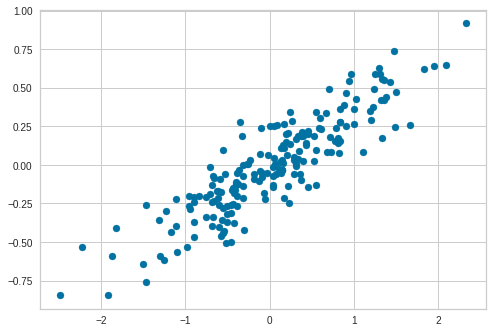

In [96]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

Temos essa visualização em 2D dos nossos dados de 2 dimensões (duas colunas). Agora vamos encontrar os vetores **componentes principais** que conseguem descreve-los

In [215]:
pca = skl.decomposition.PCA(n_components=2)

aqui, n_components significa que eu quero **DUAS** componentes principais. Como meu *dataset* possui duas colunas, eu consigo gerar até 2 componentes principais

In [227]:
pca.fit(x)

PCA(n_components=2)

In [229]:
compomentes = pca.components_

In [188]:
var_exp = pca.explained_variance_

In [223]:
def vetor(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

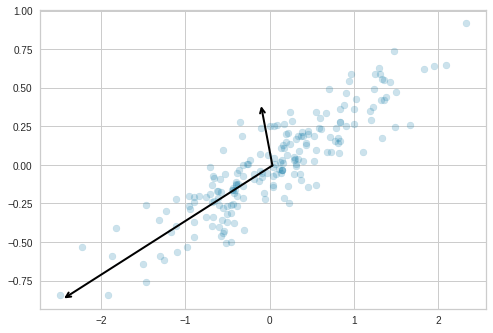

In [224]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(var_exp, compomentes):
    v = vector * 3 * np.sqrt(length)
    vetor(pca.mean_, pca.mean_ + v)

**Interpretando:** esses vetores representam os eixos principais da distribuição que minimizam resíduo e maximizam a variancia dos dados, e o módulo desses vetores a importância na descrição dos dados. Mais precisamente, são as medidas de variância dos dados quando projetados nos compomentes principais

**PCA para Redução de Dimensões**

In [233]:
from sklearn.datasets import load_digits

digitos = load_digits()

In [241]:
digitos.data.shape  # é um dataset multidimensional

(1797, 64)

In [264]:
pca_dois = skl.decomposition.PCA(n_components=2)

In [278]:
reduzido = pca_dois.fit_transform(digitos.data)

In [279]:
print(f'set original: {digitos.data.shape}\nset reduzido: {reduzido.shape}')

set original: (1797, 64)
set reduzido: (1797, 2)
